#CS 403/603 Machine Learning 
#Lab: 08-01-2021
##Closed form Linear Regression

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

from sklearn.datasets import make_regression

#Here number of feature is one
Generating the Dataset

In [ ]:
X, Y = make_regression(n_samples=500, n_features=1,n_informative=1, noise=1.8, random_state=11)

Y = Y.reshape((-1,1))
print(X.shape)
print(Y.shape)

(500, 1)
(500, 1)


#Normalizing the Dataset (Question 3)

In [ ]:
X = (X-X.mean())/X.std()

#Plotting the Dataset

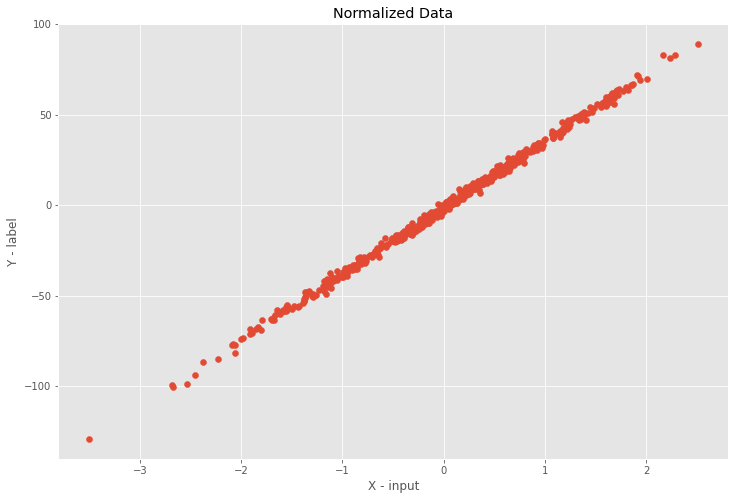

In [ ]:
plt.figure()
plt.scatter(X,Y)
plt.xlabel('X - input')
plt.ylabel('Y - label')
plt.title('Normalized Data')
plt.plot(color='blue')
plt.show()


Generating the Design matrix

In [ ]:
ones = np.ones((X.shape[0], 1))
Design_X = np.hstack((X, ones))
print(Design_X.shape)
print(Design_X[:10, :])

(500, 2)
[[ 1.79863075  1.        ]
 [-0.18894468  1.        ]
 [ 0.41231612  1.        ]
 [-0.50079422  1.        ]
 [-0.6621275   1.        ]
 [-2.06282096  1.        ]
 [-1.5905177   1.        ]
 [-0.30038338  1.        ]
 [-1.25796364  1.        ]
 [-0.27839213  1.        ]]


Loss function: Ypredict = X.Theta

In [ ]:
def Ypredict(X, theta):
  return np.dot(X, theta)

#Closed Form
Getting the theta

In [ ]:
def closedfrom(X,Y):
  Y = np.mat(Y)
  theta_1 = np.dot(X.T, X)
  theta_2 = np.dot(X.T, Y)

  #If our matrix is not invertible we can use pseudo inverse.(Question 2)
  theta = np.linalg.pinv(theta_1)* (theta_2)
  return theta

In [ ]:
theta = closedfrom(Design_X, Y)
print(theta)

[[36.73665429]
 [-1.25302068]]


#Plotting the regression line

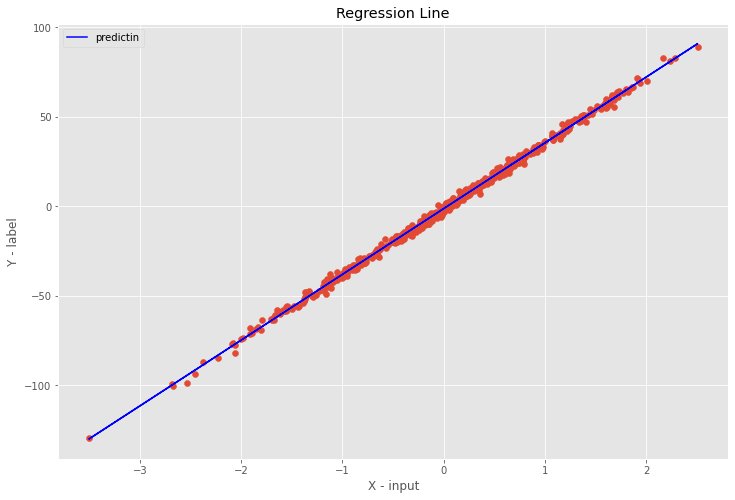

In [ ]:
plt.figure()
plt.scatter(X,Y)
plt.xlabel('X - input')
plt.ylabel('Y - label')
plt.title('Regression Line')
plt.plot(X, Ypredict(Design_X,theta),color='blue', label='predictin')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

The r2_score function computes the coefficient of determination, usually denoted as R².

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

In [ ]:
_r2 = r2_score(Y, Ypredict(Design_X, theta))
print(_r2)

0.9978304573249959
